In [17]:
from pymatgen.io.openmm.alchemy_utils import AlchemicalReaction
from pymatgen.io.openmm.generators import OpenMMAlchemyGen
from pymatgen.io.openmm.simulations import react_system

import openff.toolkit as tk

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
select_dict = {
    "acetic_acid_O": "smarts CC(=O)O and smarts C-O and element O",
    "acetic_acid_H": "smarts CC(=O)O[H] and smarts [OX2][H] and element H",
    "acetic_acid_C": "smarts CC(=O)O and smarts C=O and element C",
    "ethanol_O": "smarts [CH3][CH2]O and element O",
    "ethanol_H": "smarts [CH3][CH2]O[H] and smarts [OX2][H] and element H",
}
create_bonds = [("acetic_acid_C", "ethanol_O"), ("acetic_acid_O", "ethanol_H")]
delete_bonds = [("ethanol_O", "ethanol_H"), ("acetic_acid_O", "acetic_acid_C")]

acetic_rxn =  AlchemicalReaction(
    select_dict=select_dict,
    create_bonds=create_bonds,
    delete_bonds=delete_bonds,
)

/Users/orioncohen/projects/development/openmm-io/pymatgen-io-openmm/pymatgen/io/openmm/alchemy_utils.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_df["trigger_ix"] = ix
/Users/orioncohen/projects/development/openmm-io/pymatgen-io-openmm/pymatgen/io/openmm/alchemy_utils.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_df["trigger_ix"] = ix
/Users/orioncohen/projects/development/openmm-io/pymatgen-io-openmm/pymatgen/io/openmm/alchemy_utils.py:299: FutureWarning: In a future version of

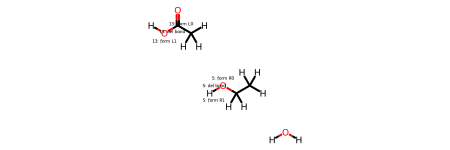

In [13]:
openff_mols = [tk.Molecule.from_smiles(smile) for smile in ["O", "CCO", "CC(=O)O"]]

acetic_rxn.visualize_reaction(openff_mols, 'viz.png')

In [16]:
generator = OpenMMAlchemyGen(default_force_field="sage")

input_mol_dicts = [
    {"smile": "O", "count": 50},
    {"smile": "CCO", "count": 50},
    {"smile": "CC(=O)O", "count": 50},
]

input_set = generator.get_input_set(
    input_mol_dicts,
    reactions=[acetic_rxn],
    density=1,
)

/Users/orioncohen/projects/development/openmm-io/pymatgen-io-openmm/pymatgen/io/openmm/alchemy_utils.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_df["trigger_ix"] = ix
/Users/orioncohen/projects/development/openmm-io/pymatgen-io-openmm/pymatgen/io/openmm/alchemy_utils.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atoms_df["trigger_ix"] = ix
/Users/orioncohen/projects/development/openmm-io/pymatgen-io-openmm/pymatgen/io/openmm/alchemy_utils.py:299: FutureWarning: In a future version of

In [18]:
output_set = react_system(input_set, 3, 500)

In [24]:
topology = output_set.inputs['reactive_system.json'].msonable.generate_topology()

unique_mols = [mol.to_smiles() for mol in topology.unique_molecules]

unique_mols

['[H][O][H]',
 '[H][C]([H])([H])[C](=[O])[O][C]([H])([H])[C]([H])([H])[H]',
 '[H][O][C]([H])([H])[C]([H])([H])[H]',
 '[H][O][C](=[O])[C]([H])([H])[H]']